# Sistema de recomendaciones de Películas usando Python 

# Ponente: Ernesto Crespo

* Desarrollador Python desde el año 2000
* Blog: [blog.crespo.org.ve](https://blog.crespo.org.ve) migrando a [www.seraph.to](https://www.seraph.to)  
* BI Developer y Data Scientist
* Github: [https://github.com/ecrespo](https://github.com/ecrespo)
* Gitlab: [https://gitlab.com/ecrespo](https://gitlab.com/ecrespo)
* Twitter: [@_seraph1](https://twitter.com/_seraph1)

<hr>

# Científico de Datos (wikipedia) 
La ciencia de datos es un campo interdisciplinario que utiliza métodos, procesos, algoritmos y sistemas científicos para extraer conocimientos y conocimientos de datos en diversas formas, tanto estructuradas como no estructuradas,  similar a la minería de datos.

La ciencia de datos es un "concepto para unificar estadísticas, análisis de datos, aprendizaje automático y sus métodos relacionados" para "entender y analizar fenómenos reales" con datos. Emplea técnicas y teorías extraídas de muchos campos dentro del contexto de las matemáticas, estadísticas, ciencias de la información y ciencias de la computación.

![](./images/venn-diagram.png)
<hr>

![](./images/revelando-los-secretos-de-twitter-festival-de-software-libre-2014-24-638.jpg)
<hr>

![](./images/habilidades-del-cientifico-de-datos.jpg)
<hr>

![](./images/dsc.png)
<hr>

# Herramientas 


## Jupyter notebook: 
[Jupyter](https://jupyter.org/)

![](./images/Jupyter3.png)

Es una aplicación web opensource que permite crear un compartir código en vivo, ecuaciones, visualización y texto narrativo. 

Entre sus usos incluye: 
* Limpieza de datos 
* Simulación numérica 
* Modelación estadística 
* Visualización de datos 
* Machine Leaarning
* Permite contar una historia (Storytelling)
* Mucho más ...


<hr>

## Pandas: 
[Pandas](https://pandas.pydata.org/)

![](./images/pandas_logo.png)

Es una librería escrita en Python para manipulación, analisis  y visualización de datos.

<hr>

## Numpy

[Numpy](http://www.numpy.org/)

![](./images/numpy.png)

Es una librería para Python que soporta grandes arreglos y matrices multidimensionales, con una alta colección de funciones matemáticas de alto nivel para operar con los
arreglos.

<hr>

## Matplotlib

[Matplotlib](https://matplotlib.org/)

![](./images/matplotlib.png)

Es una librería para Python que permite generar gráficas en 2D y 3D 

<hr>

## Seaborn 

[Seaborn](http://seaborn.pydata.org/)

![](./images/seaborn.png)

Es una librería basada en matplotlib que provee una interface de alto nivel para gráficos atractivos de información estadística.

<hr>


<hr>

# Sistema de recomendaciones de Películas
## Fuente de datos 

El repositorio donde encontrarán el notebook y la fuentes de datos original lo pueden conseguir en el siguiente enlace:

https://github.com/krishnaik06/Movie-Recommender-in-python

https://github.com/krishnaik06/Movie-Recommender-in-python/blob/master/Recommender%20Systems%20with%20Python.ipynb

Este es un sistema básico de recomendaciones, usando simplemente estadística usando Pandas y Numpy en Python

### Importar librerías 

In [1]:
import pandas as pd 
import numpy as np 

### Obtener los datos 

* [u.data.txt](./datos/u.data.txt): Archivo que contiene datos separados por tabulador(campos: user_id,item_id,rating,timestamp).
* [Mogie Id titles](./datos/Movie_Id_Titles.txt): Archivo csv que contiene los títulos de las películas (campos: item_id, titles).

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('./datos/u.data.txt', sep='\t', names=column_names)

In [3]:
# Obtener los títulos de las películas
movie_titles = pd.read_csv("./datos/Movie_Id_Titles.txt")

### Revisar los dataframes 

In [4]:
df.head() 

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
df.tail()

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
len(df)

100003

<hr>

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
movie_titles.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [10]:
len(movie_titles)

1682

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100003.0,4.624709e+02,2.666225e+02,0.0,254.0,447.0,682.0,943.0
item_id,100003.0,4.255209e+02,3.307978e+02,1.0,175.0,322.0,631.0,1682.0
rating,100003.0,3.529864e+00,1.125704e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100003.0,8.835288e+08,5.343791e+06,874724710.0,879448715.0,882826944.0,888259984.0,893286638.0


In [12]:
df.corr()

,user_id,item_id,rating,timestamp
user_id,1.000000,0.010425,-0.009377,0.019103
item_id,0.010425,1.000000,-0.189119,0.041878
rating,-0.009377,-0.189119,1.000000,-0.012004
timestamp,0.019103,0.041878,-0.012004,1.000000


In [13]:
movie_titles.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,1682.0,841.5,485.695893,1.0,421.25,841.5,1261.75,1682.0


In [14]:
movie_titles.corr()

,item_id
item_id,1.0


In [15]:
df['rating'].describe()

count    100003.000000
mean          3.529864
std           1.125704
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<hr>

### Concatenar dafaframes de títulos de películas con el rating 

Se concatenarán los dataframes df y movie_titles, noten que ambos dataframes tienen el item_id como campo, así que se usará este campo para realizar la fusión.

![](./images/fusion.jpg)

In [16]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [17]:
df.tail() 

,user_id,item_id,rating,timestamp,title
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
100002,655,1641,3,887427810,Dadetown (1995)


In [18]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [19]:
len(df)

100003

In [20]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100003.0,4.624709e+02,2.666225e+02,0.0,254.0,447.0,682.0,943.0
item_id,100003.0,4.255209e+02,3.307978e+02,1.0,175.0,322.0,631.0,1682.0
rating,100003.0,3.529864e+00,1.125704e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100003.0,8.835288e+08,5.343791e+06,874724710.0,879448715.0,882826944.0,888259984.0,893286638.0


In [22]:
df.corr() 

,user_id,item_id,rating,timestamp
user_id,1.000000,0.010425,-0.009377,0.019103
item_id,0.010425,1.000000,-0.189119,0.041878
rating,-0.009377,-0.189119,1.000000,-0.012004
timestamp,0.019103,0.041878,-0.012004,1.000000


<hr>

## Visualización de los datos 

### Importar librerías 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Gráficar un mapa de calor a partir de una correlación

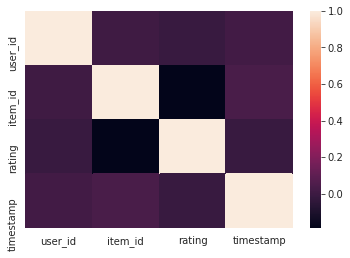

In [24]:
sns.heatmap(df.corr());

### Gráfica de pares

Esta gráfica permite ver el comportamiento de pares de variables gráficamente. 

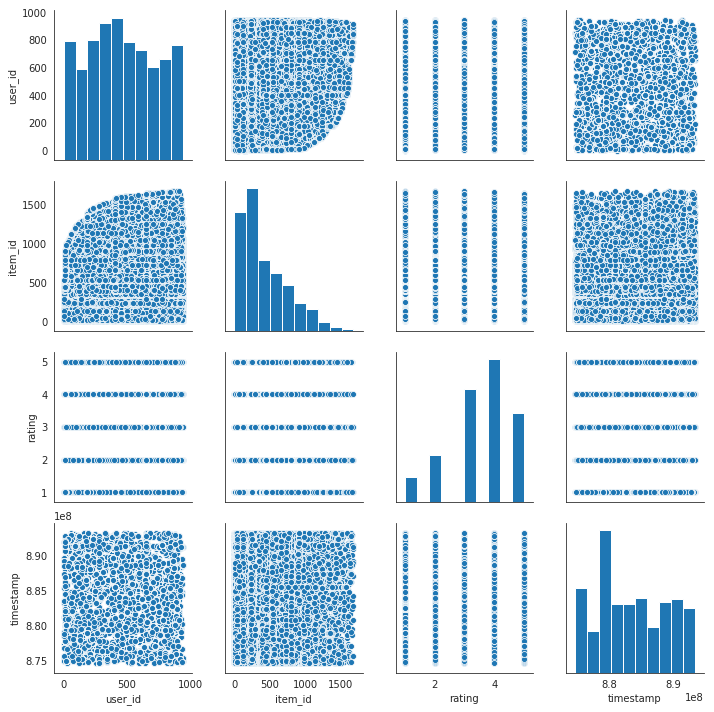

In [25]:
sns.pairplot(df);

Tener información estadística del item_id 

In [26]:
df["item_id"].describe()

count    100003.000000
mean        425.520914
std         330.797791
min           1.000000
25%         175.000000
50%         322.000000
75%         631.000000
max        1682.000000
Name: item_id, dtype: float64

Se generá una gráfica de vela

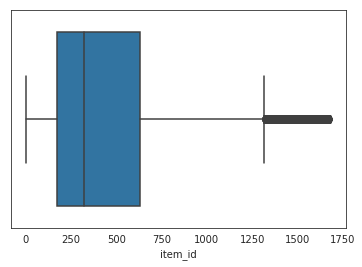

In [27]:
sns.boxplot(x=df["item_id"]);

<hr>

### Crear un dataframe con el número de rating y el rating promedio

### Se agrupa por título ordenando los promedios de rating 

In [28]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [29]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).tail()

title
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, dtype: float64

### Se agrupa por título ordenando los ratings

In [30]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [31]:
df.groupby('title')['rating'].count().sort_values(ascending=False).tail()

title
Man from Down Under, The (1943)               1
Marlene Dietrich: Shadow and Light (1996)     1
Mat' i syn (1997)                             1
Mille bolle blu (1993)                        1
Á köldum klaka (Cold Fever) (1994)            1
Name: rating, dtype: int64

### Se construye un dataframe del promedio de rating de los títulos de las películas 

De la agrupación anterior se crea un dataframe por promedio de rating

In [32]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


### Se define el número de rating

De la agrupación anterior se crea un dataframe por número de rating

In [33]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Ahora vienen los histogramas

Se genera el histograma del número de rating y del promedio de rating a partir de los dataframe anteriores.

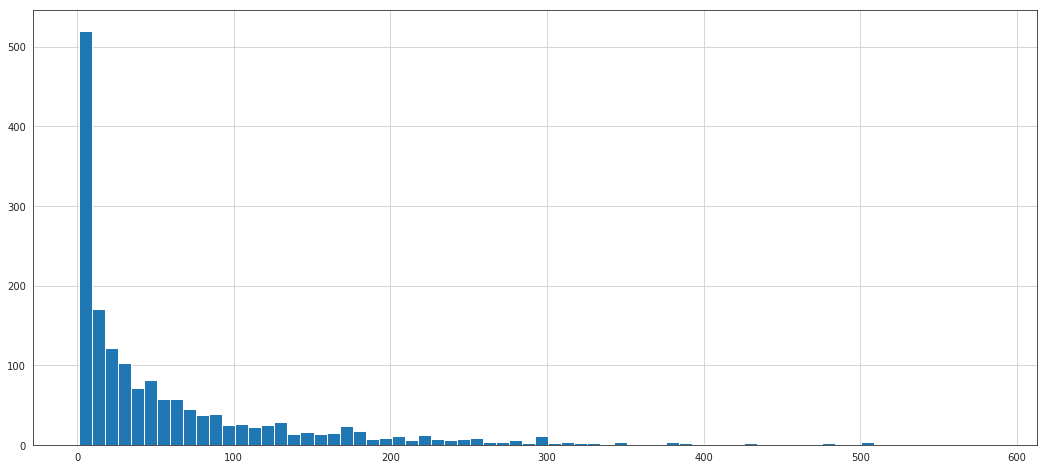

In [34]:
plt.figure(figsize=(18,8))
ratings['num of ratings'].hist(bins=70);

Se puede ver que la mayoría de las películas han recibido menos de 50 ratings, mientras el número de películas que tienen más de 100 ratings es muy bajo.

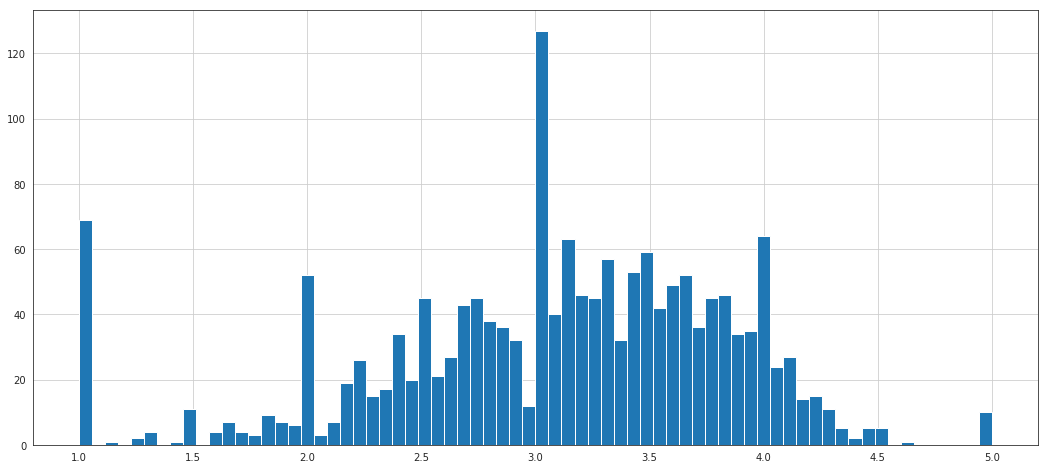

In [35]:
plt.figure(figsize=(18,8))
ratings['rating'].hist(bins=70);

Los datos tienen una debil distribución normal, el promedio est;a alrededor de 3.5

### Se genera la gráfica que une los dos histogramas anteriores

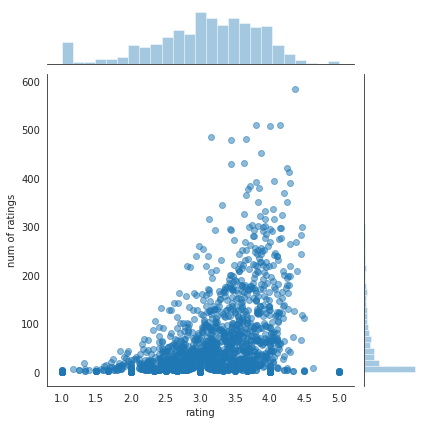

In [36]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5);


Las películas con mayor promedio de rating, tienen más número de rating, comparadas con películas que tienen bajo promedio de rating.

<hr>

## Recomendar películas similares 

Se crea un dataframe con la matriz de títulos de películas con el usuario correspondiente

In [37]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pelicula más ranqueada 

In [38]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [39]:
ratings.sort_values('num of ratings',ascending=False).tail(10)

,rating,num of ratings
title,,
Girl in the Cadillac (1995),1.0,1
He Walked by Night (1948),4.0,1
Hana-bi (1997),3.0,1
"Object of My Affection, The (1998)",4.0,1
Office Killer (1997),1.0,1
"Great Day in Harlem, A (1994)",5.0,1
"Other Voices, Other Rooms (1997)",3.0,1
Good Morning (1971),1.0,1
Girls Town (1996),3.0,1


Escogemos 2 películas, star wars y mentiroso mentiroso. 

Se define el rating de usuarios de las dos películas 

In [40]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [41]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

Se puede usar corrwith() para obtener la correlación de las dos series de pandas 

In [42]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/home/ernesto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ernesto/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [44]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

Se remueve los valores NaN 

In [45]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Ahora se ordenan las películas por corrlación, esto debería mostrar las películas similares, 
sin embargo notará que los resultados no tienen sentido, ya que hay películas que sólo 
se han visto una vez, y hay usuarios que sólo han visto star wars 

In [46]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Para arreglar esto, se filtrarán las películas que sólo tengan menos de 100 reviews (revisar, el histograma)

In [47]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Al ordenar los títulos, la salida tiene más sentido

In [48]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [49]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).tail()

,Correlation,num of ratings
title,,
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128
G.I. Jane (1997),-0.176734,175
"First Wives Club, The (1996)",-0.194496,160


Ahora lo mismo con la comedia mentiroso, mentiroso

In [50]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [51]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).tail()

,Correlation,num of ratings
title,,
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194
Welcome to the Dollhouse (1995),-0.254231,112
Raging Bull (1980),-0.308129,116


<hr>

# Más avanzado:
* [Creating a Simple Recommender System in Python using Pandas](https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/)
* [Implementing a recommendation system on Tensorflow](https://medium.com/@felsal/implementing-a-recommendation-system-on-tensorflow-e41b80793165)
* [How to build a collaborative filtering model for personalized recommendations using TensorFlow and TensorFlow Transform](https://towardsdatascience.com/how-to-build-a-collaborative-filtering-model-for-personalized-recommendations-using-tensorflow-and-b9a77dc1320)
* [TensorRec: A Recommendation Engine Framework in TensorFlow](https://hackernoon.com/tensorrec-a-recommendation-engine-framework-in-tensorflow-d85e4f0874e8)
* [Perfume Recommendations using Natural Language Processing](https://towardsdatascience.com/perfume-recommendations-using-natural-language-processing-ad3e6736074c)
* [Tutorial de Jupyter](https://towardsdatascience.com/power-ups-for-jupyter-notebooks-ebfa6e5e57a)
<hr>

# Enlaces de Interés para aprender Python y Ciencia de datos

* [https://lectures.quantecon.org/py/](https://lectures.quantecon.org/py/)
* [https://data-flair.training/blogs/python-tutorials-home/](https://data-flair.training/blogs/python-tutorials-home/)
* [https://data-flair.training/blogs/python-tutorial/](https://data-flair.training/blogs/python-tutorial/)
* [https://data-flair.training/blogs/data-science-tutorials-home/#tutorials](https://data-flair.training/blogs/data-science-tutorials-home/#tutorials)

<hr>

# Preguntas?